## Tensors

Tenor là một cấu trúc dữ liệu chuyên biệt rất giống với mảng và ma trận. Trong PyTorch dùng để mã hóa đầu vào và đầu ra của một mô hình, các tham số của mô hình.

In [4]:
import torch
import numpy as np

data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])


In [ ]:
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor}")

Random Tensor: 
 tensor([[0.7605, 0.0298, 0.7513],
        [0.5679, 0.6653, 0.0467]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is stored on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


In [ ]:
if torch.cuda.is_available():
    tensor = tensor.to("cuda") # move tensor to the GPU

In [ ]:
# operations from the list: indexing and slicing
tensor = torch.ones(4, 4)
print(f"First row: {tensor[0]}")
print(f"First column: {tensor[:, 0]}")
print(f"Last column: {tensor[..., -1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [5]:
# concatenate a sequence of tensors along a given dimension
a = torch.ones(2,2)
b = torch.rand(2,2)
c = torch.zeros(2,2)
t1 = torch.cat([a, b, c], dim=0)
print(t1)
t1 = torch.cat([a, b, c], dim=1)
print(t1)

tensor([[1.0000, 1.0000],
        [1.0000, 1.0000],
        [0.1728, 0.9192],
        [0.3313, 0.7081],
        [0.0000, 0.0000],
        [0.0000, 0.0000]])
tensor([[1.0000, 1.0000, 0.1728, 0.9192, 0.0000, 0.0000],
        [1.0000, 1.0000, 0.3313, 0.7081, 0.0000, 0.0000]])


In [7]:
x = torch.tensor([[1,1], [2,2]])
y = torch.tensor([[0,0], [1,1]])
sum = torch.add(x, y)
print(sum)

tensor([[1, 1],
        [3, 3]])


In [ ]:
# y1, y2, y3 will have the same value
# `tensor.T` returns the transpose of a tensor
tensor = torch.tensor([[1,1], [2,2]], dtype=torch.float)
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T) # matrix multiplication
y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)
print(y1)

tensor([[2., 4.],
        [4., 8.]])


In [ ]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = tensor * tensor
z2 = tensor.mul(tensor)
z3 = torch.rand_like(tensor)
torch.mul(tensor, tensor, out=z3)
print(z1)

tensor([[1., 1.],
        [4., 4.]])


In [ ]:
agg = tensor.sum()
agg_item = agg.item() # convert tensor() to numerical value
print(agg_item, type(agg_item))

6.0 <class 'float'>


In [ ]:
print(f"{tensor} \n")
tensor.add_(5) # add and store into tensor
print(tensor)

tensor([[1., 1.],
        [2., 2.]]) 

tensor([[6., 6.],
        [7., 7.]])


In [ ]:
# tensor to numpy
n = tensor.numpy()
print(n)

[[6. 6.]
 [7. 7.]]


In [ ]:
tensor.add_(1)
print(f"tensor: {tensor}")
print(f"n: {n}")

tensor: tensor([[7., 7.],
        [8., 8.]])
n: [[7. 7.]
 [8. 8.]]


In [ ]:
#numpy to tensor
n = np.ones(5)
t = torch.from_numpy(n)

np.add(n, 1, out=n)
print(f"t: {t}")
print(f"n: {n}")

t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]


## Transforms

transforms để thực hiện một số thao tác với dữ liệu và làm cho nó phù hợp để đào tạo
TorchVision datasets have two parameters -transform và target_transform
Sử dụng tensor để chuẩn hóa features và mã hóa một lần - one-hot encoded tensor với các nhãn

ToTensor() converts a PIL image or NumPy ndarray into a FloatTensor. and scales the image’s pixel intensity values in the range [0., 1.]

In [ ]:
import torch
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda

ds = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
)

## NN in FashionMNIST

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# import sys
# !{sys.executable} -m pip install matplotlib

import matplotlib.pyplot as plt

### Load dataset FashionMNIST

In [ ]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

In [ ]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


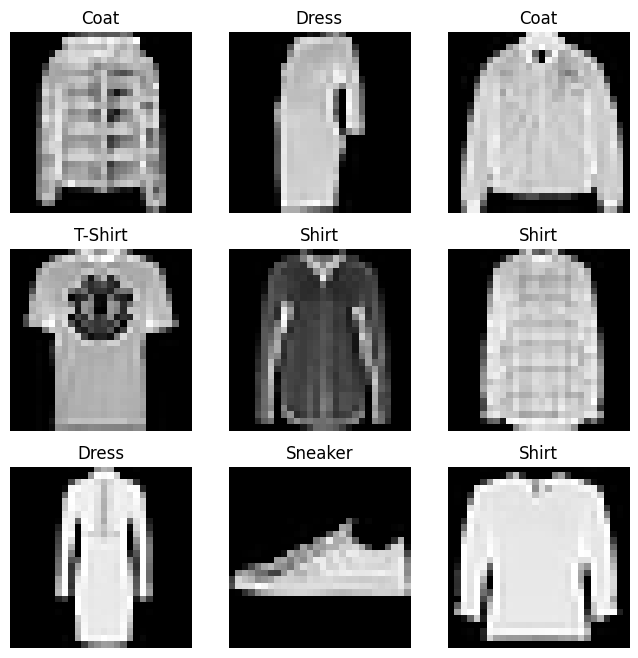

In [ ]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

### Creating Models

In [ ]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class NeuralNetwork(nn.Module): # define a neural network define a neural network nn.Module
    # define the layers 
    def __init__(self): 
        super().__init__()
        self.flatten = nn.Flatten() # convert 2D to dim=0 with 28*28 values
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # in features 28*28 => out feature 512
            nn.ReLU(), # complex mappings between the model’s inputs and outputs - non-linearity
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    # specify how data will pass through the network
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

Using cuda device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


### Optimizing the Model Parameters

In [ ]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation (lan truyền ngược)
        optimizer.zero_grad() # reset the gradients (độ dốc) of model parameters to 0
        loss.backward() # Backpropagation the prediction loss
        optimizer.step() # adjust the parameters by the gradients collected in the backward pass.
 
        if batch % 100 == 0:
            loss, current = loss.item(), (batch + 1) * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [ ]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [ ]:
# normalize and compute prediction error
loss_fn = nn.CrossEntropyLoss()
# the process of adjusting (điều chỉnh) model parameters to reduce model error in each training step
# Stochastic Gradient Descent giảm độ dốc ngẫu nhiên
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

epochs = 5 # lần lặp
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.300621  [   64/60000]
loss: 2.295409  [ 6464/60000]
loss: 2.275762  [12864/60000]
loss: 2.267669  [19264/60000]
loss: 2.261706  [25664/60000]
loss: 2.215565  [32064/60000]
loss: 2.237626  [38464/60000]
loss: 2.195642  [44864/60000]
loss: 2.194701  [51264/60000]
loss: 2.163383  [57664/60000]
Test Error: 
 Accuracy: 41.5%, Avg loss: 2.160241 

Epoch 2
-------------------------------
loss: 2.171788  [   64/60000]
loss: 2.166134  [ 6464/60000]
loss: 2.110706  [12864/60000]
loss: 2.118856  [19264/60000]
loss: 2.082436  [25664/60000]
loss: 2.011526  [32064/60000]
loss: 2.052617  [38464/60000]
loss: 1.970240  [44864/60000]
loss: 1.971368  [51264/60000]
loss: 1.907358  [57664/60000]
Test Error: 
 Accuracy: 59.8%, Avg loss: 1.903757 

Epoch 3
-------------------------------
loss: 1.935408  [   64/60000]
loss: 1.912081  [ 6464/60000]
loss: 1.797282  [12864/60000]
loss: 1.830121  [19264/60000]
loss: 1.733693  [25664/60000]
loss: 1.673861  [32064/600

### Saving Models

In [ ]:
torch.save(model.state_dict(), "model.pth")
print("Saved PyTorch Model State to model.pth")

Saved PyTorch Model State to model.pth


### Loading Models

In [ ]:
model = NeuralNetwork()
model.load_state_dict(torch.load("model.pth"))

<All keys matched successfully>

In [ ]:
# used to make predictions.
classes = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

model.eval()
x, y = test_data[0][0], test_data[0][1]
with torch.no_grad():
    pred = model(x)
    predicted, actual = classes[pred[0].argmax(0)], classes[y]
    print(f'Predicted: "{predicted}", Actual: "{actual}"')

Predicted: "Ankle boot", Actual: "Ankle boot"


## RNN & LSTM

In [1]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

# import sys
# !{sys.executable} -m pip install matplotlib

import matplotlib.pyplot as plt

In [74]:
# Download training data from open datasets.
training_data = datasets.MNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.MNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

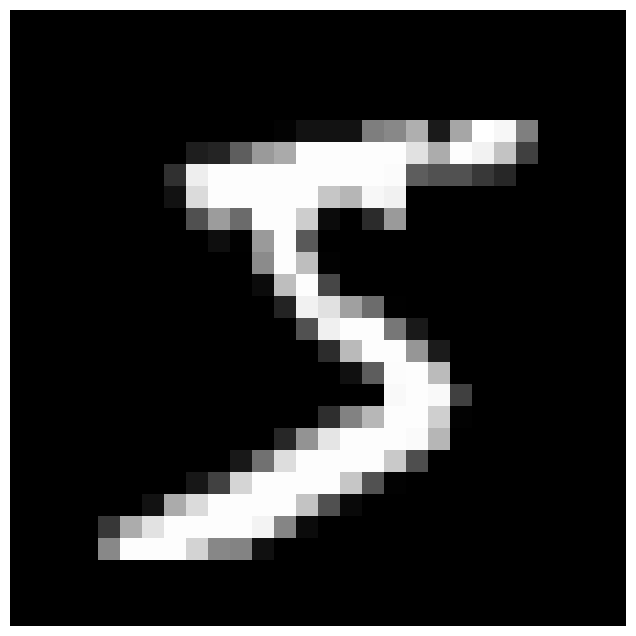

In [75]:
figure = plt.figure(figsize=(8, 8))
img, label = training_data[0]
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [76]:
batch_size = 100

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([100, 1, 28, 28])
Shape of y: torch.Size([100]) torch.int64


In [77]:
input_size = 28 # kích thước ảnh là 28*28
sequence_length = 28
hidden_size = 128
num_layers = 2
num_classes = 10
num_epochs = 2

In [78]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "mps" if torch.backends.mps.is_available() else "cpu"
print(f"Using {device} device")

# Define model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes): 
        super().__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first = True)
        # batch_first is True : x -> (batch_size, seq, input_size)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, num_classes), # 128 => out feature 10
        )
        

    # specify how data will pass through the network
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # (num_layers, batch, hidden_size)
        out, _ = self.rnn(x, h0)
        # out: (batch_size, seq_length, hidden_size)
        # out (N, 28, 128)
        out = out[:, -1, :]
        # out (N, 128)
        out = self.fc(out)
        return out

modelRNN = RNN(input_size, hidden_size, num_layers, num_classes).to(device)
print(modelRNN)

Using cuda device
RNN(
  (rnn): RNN(28, 128, num_layers=2, batch_first=True)
  (fc): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [79]:
# Define model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes): 
        super().__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first = True)
        # batch_first is True : x -> (batch_size, seq, input_size)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, num_classes), # 128 => out feature 10
        )
        

    # specify how data will pass through the network
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # (num_layers, batch, hidden_size)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device) # (num_layers, batch, hidden_size)
        out, _ = self.lstm(x, (h0, c0))
        # out: (batch_size, seq_length, hidden_size)
        # out (N, 28, 128)
        out = out[:, -1, :]
        # out (N, 128)
        out = self.fc(out)
        return out

modelLSTM = LSTM(input_size, hidden_size, num_layers, num_classes).to(device)
print(modelLSTM)

LSTM(
  (lstm): LSTM(28, 128, num_layers=2, batch_first=True)
  (fc): Sequential(
    (0): Linear(in_features=128, out_features=10, bias=True)
  )
)


In [82]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelRNN.parameters(), lr=1e-3)

n_total_step = len(train_dataloader)
for epochs in range(num_epochs):
    for batch, (images, labels) in enumerate(train_dataloader):
        images, labels = images.reshape(-1, sequence_length, input_size).to(device), labels.to(device)

        # Compute prediction error
        pred = modelRNN(images)
        loss = loss_fn(pred, labels)

        # Backpropagation (lan truyền ngược)
        optimizer.zero_grad() # reset the gradients (độ dốc) of model parameters to 0
        loss.backward() # Backpropagation the prediction loss
        optimizer.step() # adjust the parameters by the gradients collected in the backward pass.
 
        if (batch+1) % 100 == 0:
            print(f"Epoch [{epochs+1}/{num_epochs}], Step [{batch+1}/{n_total_step}], Loss: {loss.item()}")

with torch.no_grad():
    n_sample, correct = 0, 0
    for images, labels in test_dataloader:
        images, labels = images.reshape(-1, sequence_length, input_size).to(device), labels.to(device)
        pred = modelRNN(images)
        n_sample += labels.size(0)
        
        correct += (pred.argmax(1) == labels).sum().item()
    acc = 100.0 * correct / n_sample
    print(f"acc: {acc}")
    
    

Epoch [1/2], Step [100/600], Loss: 0.9735669493675232
Epoch [1/2], Step [200/600], Loss: 0.7482567429542542
Epoch [1/2], Step [300/600], Loss: 0.8852946758270264
Epoch [1/2], Step [400/600], Loss: 0.6554358005523682
Epoch [1/2], Step [500/600], Loss: 0.5318505764007568
Epoch [1/2], Step [600/600], Loss: 0.4494693875312805
Epoch [2/2], Step [100/600], Loss: 0.24581240117549896
Epoch [2/2], Step [200/600], Loss: 0.20004932582378387
Epoch [2/2], Step [300/600], Loss: 0.5112122893333435
Epoch [2/2], Step [400/600], Loss: 0.3515833020210266
Epoch [2/2], Step [500/600], Loss: 0.403218537569046
Epoch [2/2], Step [600/600], Loss: 0.23901285231113434
acc: 85.79


In [83]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(modelLSTM.parameters(), lr=1e-3)

n_total_step = len(train_dataloader)
for epochs in range(num_epochs):
    for batch, (images, labels) in enumerate(train_dataloader):
        images, labels = images.reshape(-1, sequence_length, input_size).to(device), labels.to(device)

        # Compute prediction error
        pred = modelLSTM(images)
        loss = loss_fn(pred, labels)

        # Backpropagation (lan truyền ngược)
        optimizer.zero_grad() # reset the gradients (độ dốc) of model parameters to 0
        loss.backward() # Backpropagation the prediction loss
        optimizer.step() # adjust the parameters by the gradients collected in the backward pass.
 
        if (batch+1) % 100 == 0:
            print(f"Epoch [{epochs+1}/{num_epochs}], Step [{batch+1}/{n_total_step}], Loss: {loss.item()}")

with torch.no_grad():
    n_sample, correct = 0, 0
    for images, labels in test_dataloader:
        images, labels = images.reshape(-1, sequence_length, input_size).to(device), labels.to(device)
        pred = modelLSTM(images)
        n_sample += labels.size(0)
        
        correct += (pred.argmax(1) == labels).sum().item()
    acc = 100.0 * correct / n_sample
    print(f"acc: {acc}")
    

Epoch [1/2], Step [100/600], Loss: 0.6825345754623413
Epoch [1/2], Step [200/600], Loss: 0.5235305428504944
Epoch [1/2], Step [300/600], Loss: 0.40095728635787964
Epoch [1/2], Step [400/600], Loss: 0.2563858926296234
Epoch [1/2], Step [500/600], Loss: 0.31133851408958435
Epoch [1/2], Step [600/600], Loss: 0.15975135564804077
Epoch [2/2], Step [100/600], Loss: 0.05188586190342903
Epoch [2/2], Step [200/600], Loss: 0.11822623014450073
Epoch [2/2], Step [300/600], Loss: 0.19420307874679565
Epoch [2/2], Step [400/600], Loss: 0.18011562526226044
Epoch [2/2], Step [500/600], Loss: 0.10867628455162048
Epoch [2/2], Step [600/600], Loss: 0.150856614112854
acc: 96.74
